In [124]:
from PIL import Image


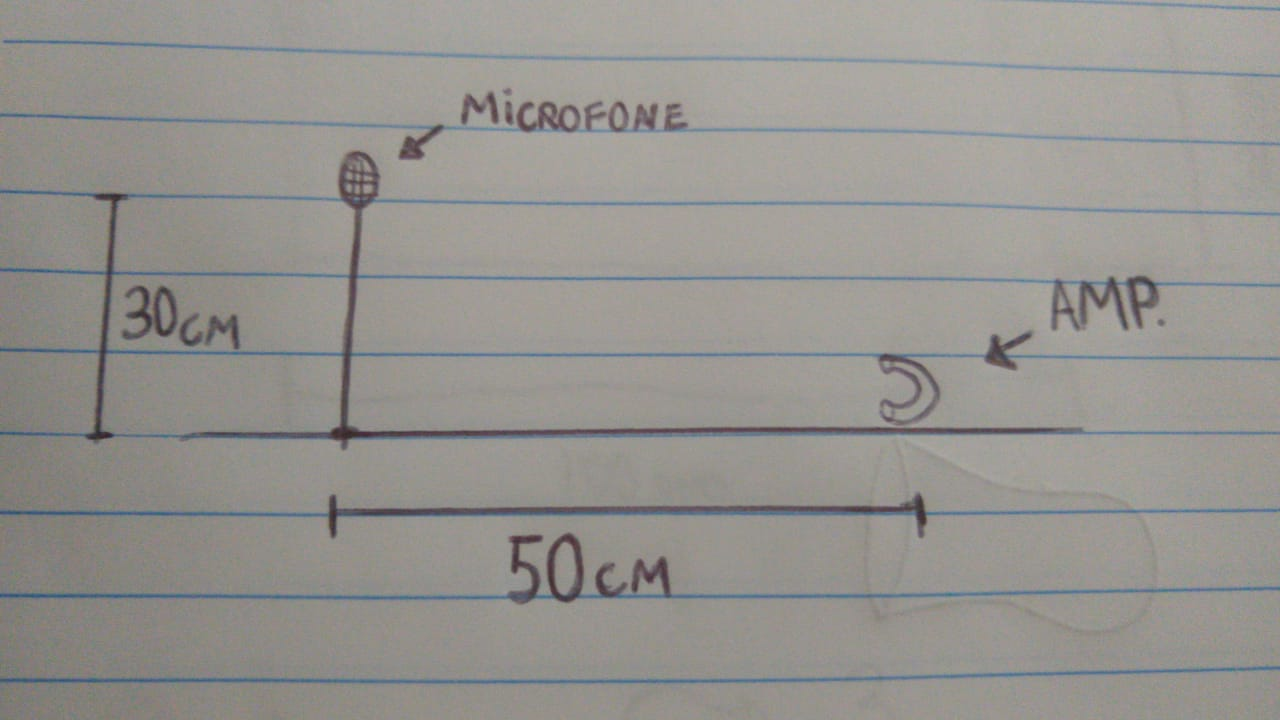

In [125]:
# open setup image 
jpegfile = Image.open("images/setup.jpeg")
jpegfile

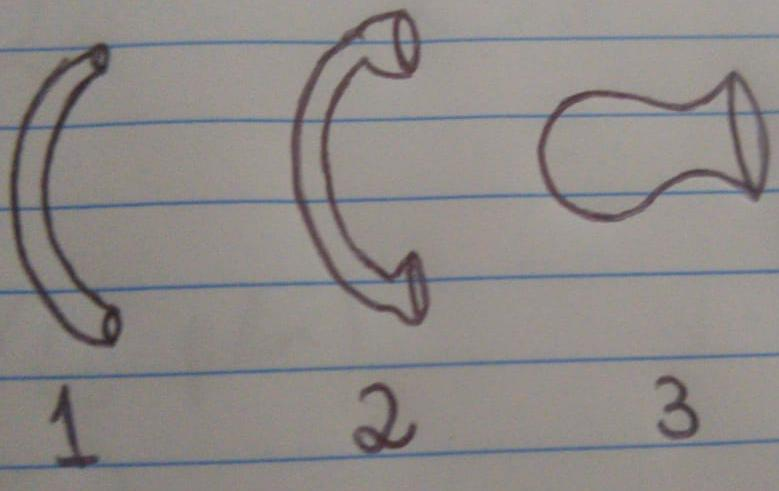

In [126]:
# open amplifiers image
jpegfile = Image.open("images/amps.jpeg")
jpegfile

In [127]:
from os import listdir
from os.path import isfile, join

# pick all audio samples 
audiodir = 'frontAudio/'
filenames = [f for f in listdir(audiodir) if isfile(join(audiodir, f))]
list.sort(filenames)
print(filenames)

['ruido0.wav', 'ruido1.wav', 'ruido2.wav', 'ruido3.wav']


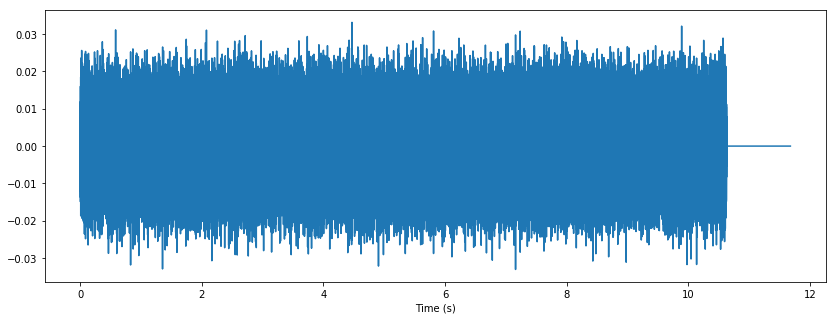

as ondas sonoras dos áudios não nos dão nenhuma informação pois são muito iguais


In [176]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# pick sample and plot it
fname = filenames[0]
y, sr = librosa.load(audiodir + fname)
plt.figure(figsize=(14, 5))
t = np.linspace(0, len(y)/sr, len(y))
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.show()
print("As ondas sonoras dos áudios não nos dão nenhuma informação pois são muito semelhantes entre si.")

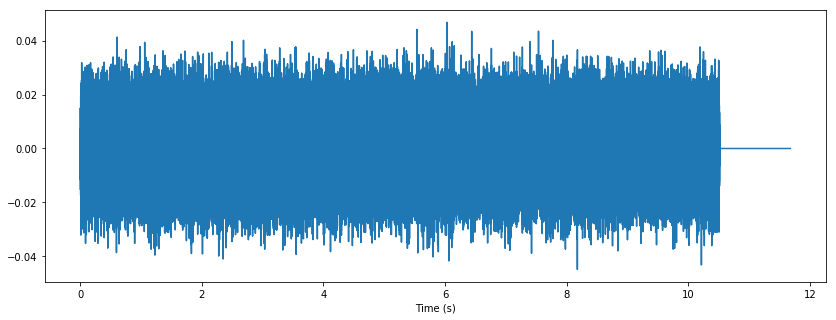

In [129]:
# pick sample and plot it
fname = filenames[1]
y, sr = librosa.load(audiodir + fname)
plt.figure(figsize=(14, 5))
t = np.linspace(0, len(y)/sr, len(y))
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.show()

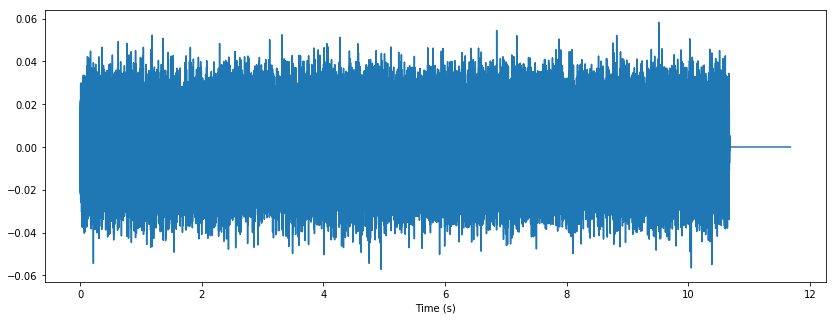

In [130]:
# pick sample and plot it
fname = filenames[2]
y, sr = librosa.load(audiodir + fname)
plt.figure(figsize=(14, 5))
t = np.linspace(0, len(y)/sr, len(y))
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.show()

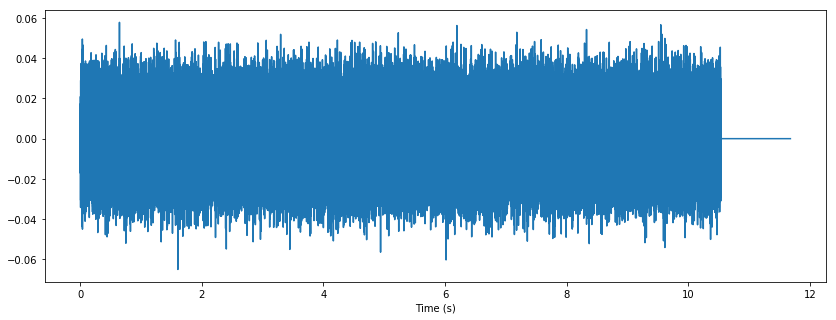

In [131]:
# pick sample and plot it
fname = filenames[3]
y, sr = librosa.load(audiodir + fname)
plt.figure(figsize=(14, 5))
t = np.linspace(0, len(y)/sr, len(y))
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.show()

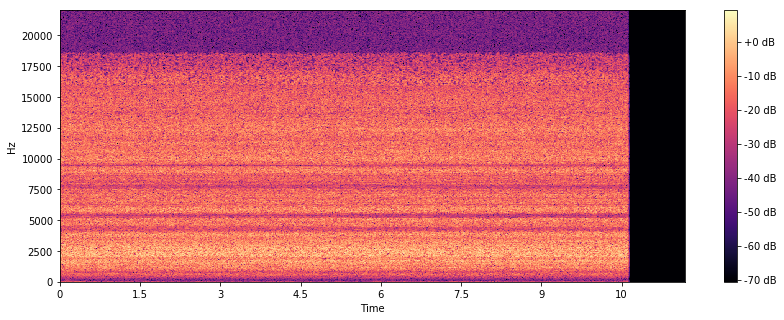

In [132]:
import librosa.display

# pick sample features
# x = samples; sr = sampleRate
x, sr = librosa.load(audiodir+filenames[0], sr=44100)
#print(type(x), type(sr))
#print(x.shape, sr)

X = librosa.stft(x)
Xdb0 = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb0, sr=sr, x_axis='time', y_axis='hz',cmap='magma')
plt.colorbar(format='%+2.0f dB')

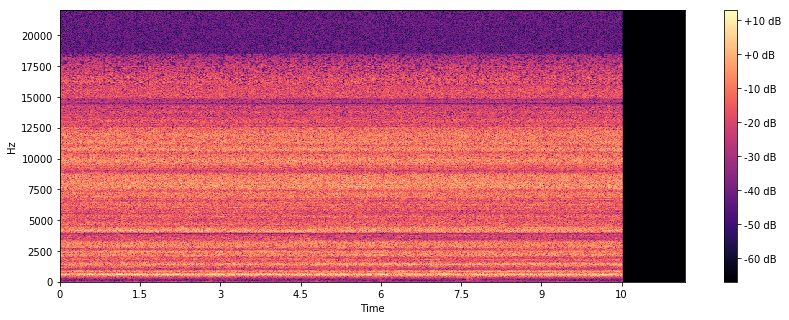

In [133]:
# pick sample features
# x = samples; sr = sampleRate
x, sr = librosa.load(audiodir+filenames[1], sr=44100)

X = librosa.stft(x)
Xdb1 = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb1, sr=sr, x_axis='time', y_axis='hz',cmap='magma')
plt.colorbar(format='%+2.0f dB')
print("O espectrograma 1 atenuou apenas uma faixa por volta de 15.000hz.")

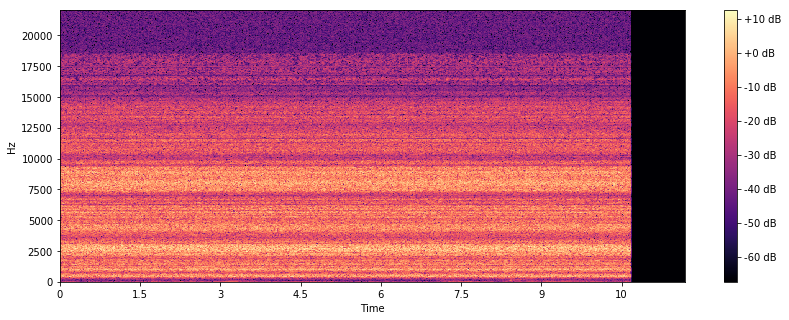

In [134]:
# pick sample features
# x = samples; sr = sampleRate
x, sr = librosa.load(audiodir+filenames[2], sr=44100)

X = librosa.stft(x)
Xdb2 = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb2, sr=sr, x_axis='time', y_axis='hz',cmap='magma')
plt.colorbar(format='%+2.0f dB')
print("O espectrograma 2 atenuou algumas frequencias de 10.000hz pra cima.")

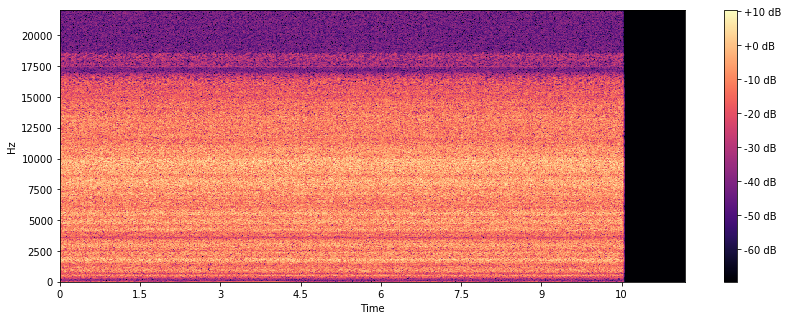

In [135]:
# pick sample features
# x = samples; sr = sampleRate
x, sr = librosa.load(audiodir+filenames[3], sr=44100)

X = librosa.stft(x)
Xdb3 = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb3, sr=sr, x_axis='time', y_axis='hz',cmap='magma')
plt.colorbar(format='%+2.0f dB')
print("O espectrograma 3 atenuou uma faixa entre 17.000hz e 17.500hz.")

<Figure size 432x288 with 0 Axes>

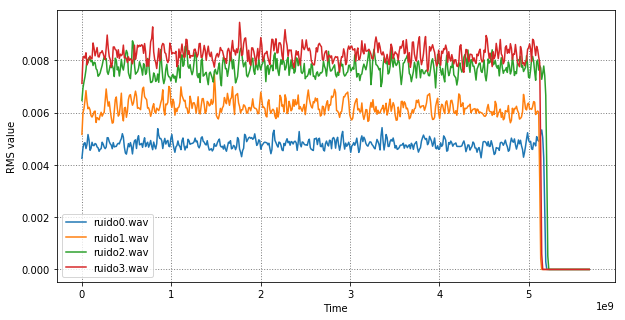

In [136]:
plt.figure()
plt.figure(figsize=(10,5))
plt.grid(color='gray', linestyle=':', linewidth=1)

# apply RMS descriptor and plot values
for i in range(4): # Change the range to plot more samples
  y, sr = librosa.load(audiodir+ filenames[i])
  S = np.abs(librosa.stft(y))
  t = np.linspace(0, len(y)*sr, S.shape[1])
  feat = librosa.feature.rms(S=S)
  plt.plot(t, feat.T, label=filenames[i])

plt.xlabel('Time')
plt.ylabel('RMS value')
plt.legend()
plt.show()
print("O valor RMS obtido pelos amps de embocadura maior foram maiores")

<Figure size 432x288 with 0 Axes>

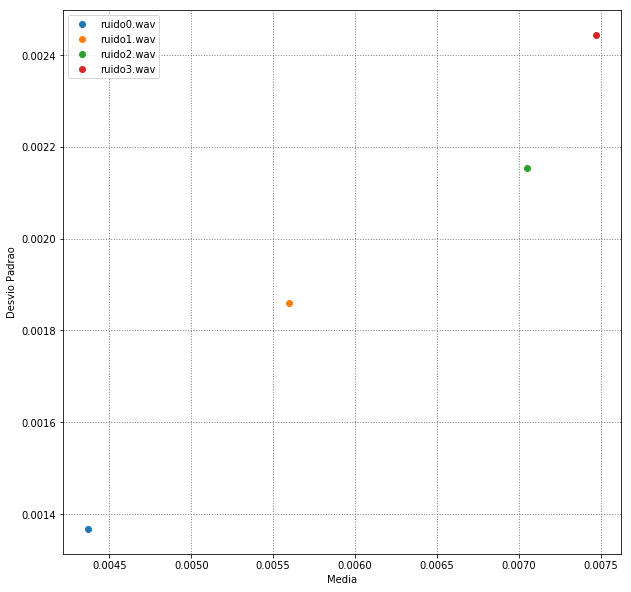

In [139]:
plt.figure()
plt.figure(figsize=(10,10))
plt.grid(color='gray', linestyle=':', linewidth=1)

# pick mean and standard deviation by RMS and plot in a 2D graph
for i in range(4):
  y, sr = librosa.load(audiodir+filenames[i])
  S = np.abs(librosa.stft(y))
  t = np.linspace(0, len(y)*sr, S.shape[1])
  feat = librosa.feature.rms(S=S)
  feat_mean = np.mean(feat)
  feat_std = np.std(feat)
  plt.plot(feat_mean, feat_std, 'o', label=filenames[i])

plt.xlabel('Media')
plt.ylabel('Desvio Padrao')
plt.legend()
plt.show()
print("Nota-se que os amps com embocadura grande ficaram mais próximos no gráfico.")

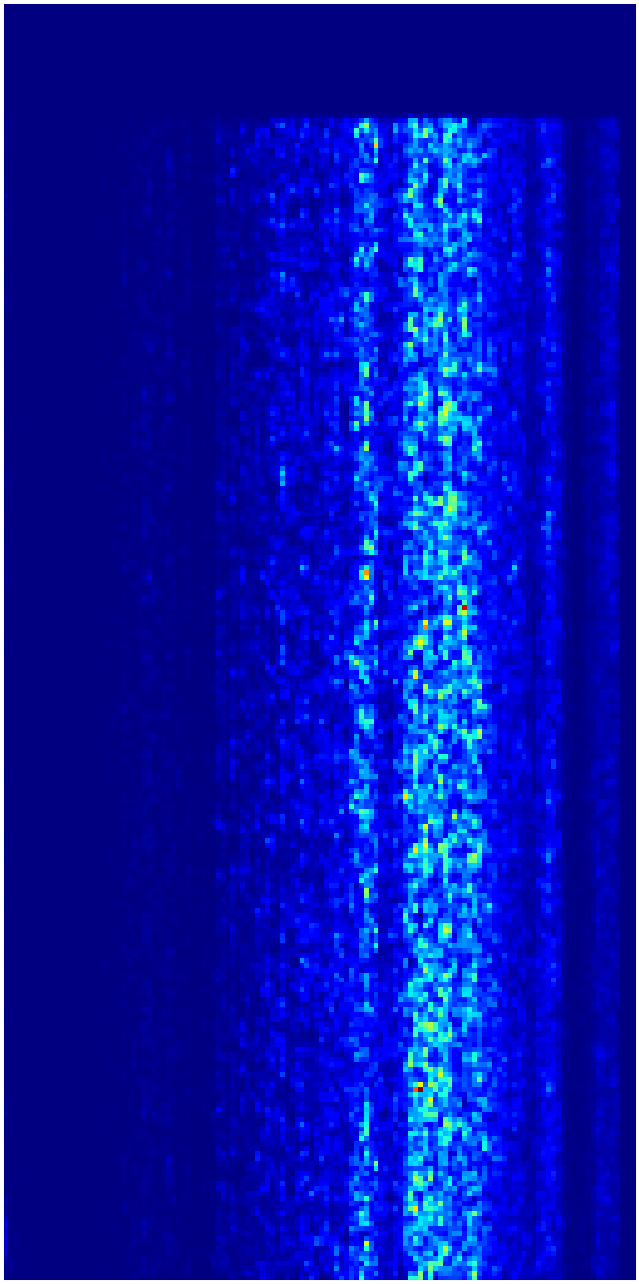

In [183]:
sig, rate = librosa.load(audiodir+filenames[0], sr=11250)

spectrogram = librosa.feature.melspectrogram(y=sig, sr=rate)
spec_shape = spectrogram.shape
fig = plt.figure(figsize=(spec_shape), dpi=5)
librosa.display.specshow(spectrogram.T, cmap=cm.jet)
plt.tight_layout()

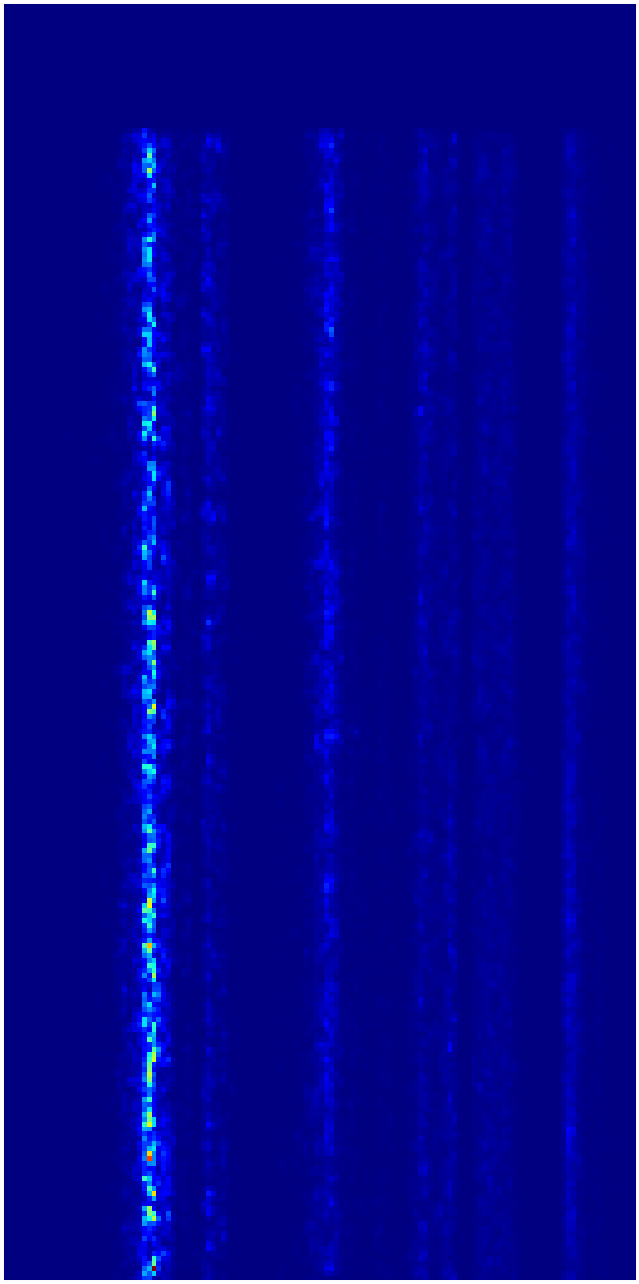

In [184]:
sig, rate = librosa.load(audiodir+filenames[1], sr=11250)

spectrogram = librosa.feature.melspectrogram(y=sig, sr=rate)
spec_shape = spectrogram.shape
fig = plt.figure(figsize=(spec_shape), dpi=5)
librosa.display.specshow(spectrogram.T, cmap=cm.jet)
plt.tight_layout()

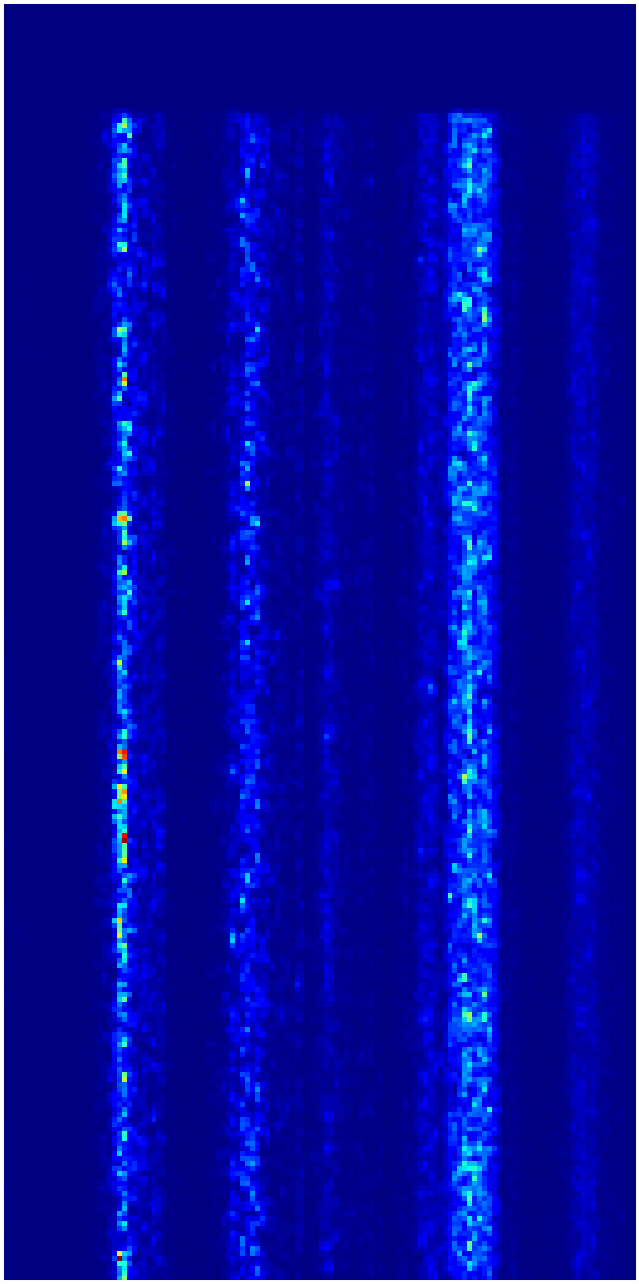

In [188]:
sig, rate = librosa.load(audiodir+filenames[2], sr=11250)

spectrogram = librosa.feature.melspectrogram(y=sig, sr=rate)
spec_shape = spectrogram.shape
fig = plt.figure(figsize=(spec_shape), dpi=5)
librosa.display.specshow(spectrogram.T, cmap=cm.jet)
plt.tight_layout()

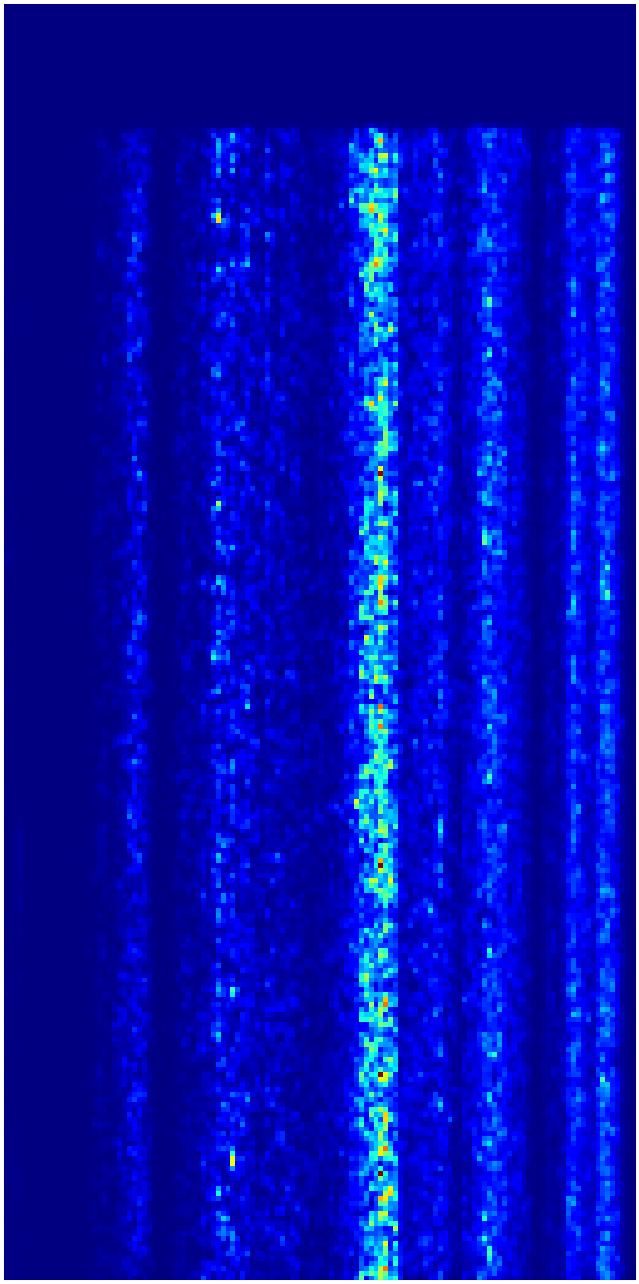

In [189]:
sig, rate = librosa.load(audiodir+filenames[3], sr=11250)

spectrogram = librosa.feature.melspectrogram(y=sig, sr=rate)
spec_shape = spectrogram.shape
fig = plt.figure(figsize=(spec_shape), dpi=5)
librosa.display.specshow(spectrogram.T, cmap=cm.jet)
plt.tight_layout()